# Catalogue statistics

This section includes statistics about the Bio-IT courses in years 2018 - 2022.

In [90]:
# NO CODE
import os

# get absolute path
abs_path = os.path.abspath('').split('/')
file_path = '/'.join(abs_path[:-2])+'/'

In [91]:
# NO CODE
from IPython.display import display, FileLink

local_file = FileLink(file_path+'data/done-data.tsv', result_html_prefix="Download the course data: ")
display(local_file)

/Users/lisanna/Documents/Projects/Bio-IT_courses-classification/bio-it-courses-jupyterbook/data/done-data.tsv

Text(0.5, 1.0, 'Number of courses per year')

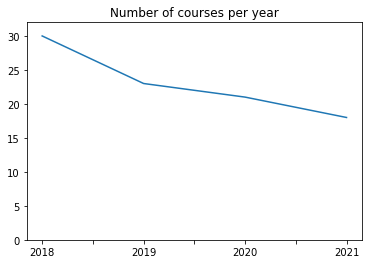

In [92]:
# HIDE CODE
import matplotlib.pyplot as plt
import pandas as pd

# import data
df = pd.read_csv(file_path + "data/done-data.tsv", sep="\t")

beginner_exp = [k for k in df.keys() if 'Beginner ' in k]
intermediate_exp = [k for k in df.keys() if 'Intermediate ' in k]
advanced_exp = [k for k in df.keys() if 'Advanced ' in k]
all_exp = beginner_exp + intermediate_exp + advanced_exp

label = 'Year of training'
# plot number of courses per year
df[label] = df[label].astype(str) # convert year to string to be treated as label
df[label].value_counts().sort_index().plot.line(ylim=(0,32))
plt.title('Number of courses per year')

Text(0.5, 1.0, 'Number of attendees per year')

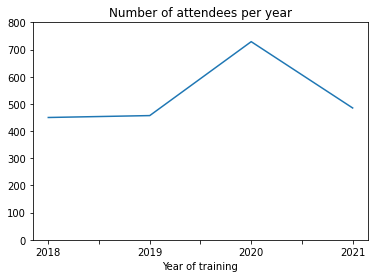

In [93]:
# HIDE CODE
# plot number of attendees per year
df.groupby('Year of training')['Number of attendees'].agg('sum').plot.line(ylim=(0,800))
plt.title('Number of attendees per year')

In [94]:
# HIDE CODE
# show number of attendees per year per type of course
df.groupby(['Year of training', 'Format (In-person/Virtual/...)'])['Number of attendees'].agg('sum')

Year of training  Format (In-person/Virtual/...)
2018              In-person                         450
2019              In-person                         457
2020              In-person                         181
                  Virtual                           548
2021              Virtual                           485
Name: Number of attendees, dtype: int64

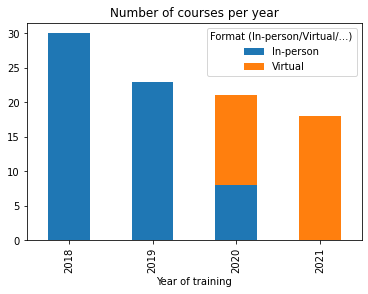

In [95]:
# HIDE CODE
# plot number of courses per year, with course format
df.groupby(['Year of training', 'Format (In-person/Virtual/...)']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Number of courses per year')
df.groupby(['Year of training', 'Format (In-person/Virtual/...)']).size()
plt.savefig(file_path + "figures/format-courses.svg", format="svg")

In [96]:
# HIDDEN
# count hours per expertise
exp_dic = {k: df[k].sum() for k in all_exp}
sorted_keys = sorted(exp_dic, key=exp_dic.get, reverse=True)
for k in sorted_keys:
    print(k, exp_dic[k])

Beginner Programming languages 197
Beginner Image analysis 101
Beginner Exploratory data analysis and visualisation 64
Beginner Biological networks analysis 53
Beginner Statistics and machine learning 50
Beginner Biological modelling 47
Intermediate Image analysis 45
Beginner Command-line computing 44
Beginner Using specialised research software 39
Intermediate Statistics and machine learning 37
Beginner Data management and curation 30
Beginner Software project management 30
Beginner Computational workflow management 19
Intermediate Programming languages 19
Beginner Cluster computing 18
Intermediate Cluster computing 18
Intermediate Biological networks analysis 16
Intermediate Exploratory data analysis and visualisation 15
Beginner Metagenomics and other meta-omics 11
Intermediate Using specialised research software 11
Beginner Structural biology 10
Intermediate Software project management 9
Beginner Genomics and comparative genomics 7
Beginner Proteomics and protein analysis 7
Beginne

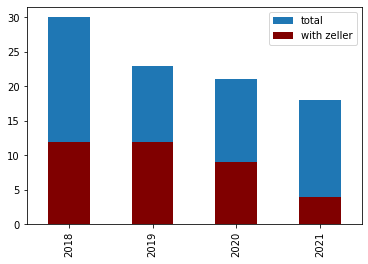

In [97]:
# HIDDEN
# courses involving the Zeller Group
zeller_team = set([
    'Georg Zeller',
    'Sina-Victoria Barysch',
    'Mike Smith',
    'Carlos Geert Pieter Voogdt', 'Carlos Voogt',
    'Martil Larralde',
    'Fabian Springer',
    'Christian Schudoma',
    'Ruby Priyadarshini Ponnudurai', 'Ruby Ponnudurai',
    'Laura Michelle Carroll', 'Laura Carroll',
    'Jakob Wirbel',
    'Lisanna Paladin',
    'Toby Hodges', # past members
    'Jonas Simon Fleck', 'Jonas Fleck',
    'Konrad Zych'
    # other
])
zeller_df = pd.DataFrame([
    row for index, row in df.iterrows()
    if set(row['Instructors'].strip().split(',') + row['Helpers'].strip().split(',')) & zeller_team
], columns=df.columns)
ax = df['Year of training'].value_counts().sort_index().plot(kind = 'bar', label='total')
zeller_df['Year of training'].value_counts().sort_index().plot(kind = 'bar', color='maroon', label='with zeller')
ax.legend()
plt.savefig(file_path + "figures/zeller-courses.svg", format="svg")

2021    9
2020    9
2018    7
2019    7
Name: Year of training, dtype: int64


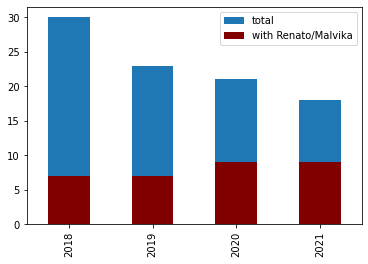

In [98]:
# HIDDEN
# courses involving the Gibson Group
gibson_team = set([
    'Renato Alves',
    'Malvika Sharan'
])
gibson_df = pd.DataFrame([
    row for index, row in df.iterrows()
    if set(row['Instructors'].strip().split(',') + row['Helpers'].strip().split(',')) & gibson_team
], columns=df.columns)
ax = df['Year of training'].value_counts().sort_index().plot(kind = 'bar', label='total')
gibson_df['Year of training'].value_counts().sort_index().plot(kind = 'bar', color='maroon', label='with Renato/Malvika')
ax.legend()
plt.savefig(file_path + "figures/gibson-courses.svg", format="svg")
print(gibson_df['Year of training'].value_counts())

In [99]:
# NO CODE
gl_definitions = {
        'Zeller': set(['Toby Hodges', 'Lisanna Paladin', 'Georg Zeller']),
        'Gibson': set(['Malvika Sharan', 'Renato Alves'])
    }

def assignGL(row):
    instructors, helpers = row['Instructors'].strip().split(','), row['Helpers'].strip().split(',')
    all = set(instructors) | set(helpers)
    pi = [d for d in gl_definitions if gl_definitions[d]&all]
    if len(pi) == 0:
        pi = all
    return ','.join(pi)

# Generate table of all courses
df = df.sort_values(['Date'])
course_table = pd.DataFrame(
    columns = ['Year', 'Cat', 'Title', 'Location', 'Hosting org', 'No', 'Freq', 'GT/TL Name', 'deNBI', 'date']
)
course_table['Year'] = df['Year of training']
course_table['Cat']  = 'K'
course_table['Title'] = df['Course name']
course_table['Location'] = df['Location']
course_table['Hosting org'] = 'Bio-IT'
course_table['No'] = df['Number of attendees']
course_table['Freq'] = 'O'
course_table['GT/TL Name'] = df.apply(lambda row: assignGL(row), axis=1)
course_table['deNBI'] = 'N'
course_table['date'] = df['Date']
course_table.to_csv(file_path+'courses_table.csv')

def get_location(row):
    definitions = {
        'EMBL': 'Heidelberg (DE)',
        'University College Dublin': 'Dublin (IE)',
        'Universidad Nacional de Quilmes': 'Quilmes (AR)',
        'BRFAA': 'Athens (GR)',
        'EBI': 'Hinxton (UK)'
    }
    return definitions[row['Host']]

def assignGL_deNBI(row):
    pi = [d for d in gl_definitions if set(row['Organizer'].strip().split(','))&gl_definitions[d]]
    return ','.join(pi)

# check if de.NBI
deNBI_df = pd.read_excel(file_path + "data/deNBI_2018-2022.ods", engine="odf")
deNBI_df = deNBI_df.sort_values(by='Date')

deNBI_table = pd.DataFrame(
    columns = ['Year', 'Cat', 'Title', 'Location', 'Hosting org', 'No', 'Freq', 'GT/TL Name']
)
deNBI_table['Year'] = deNBI_df['Date']
deNBI_table['Cat']  = 'K'
deNBI_table['Title'] = deNBI_df['Title']
deNBI_table['Location'] = deNBI_df.apply(lambda row: get_location(row), axis=1)
deNBI_table['Hosting org'] = 'Bio-IT'
deNBI_table['Freq'] = 'O'
deNBI_table['GT/TL Name'] = deNBI_df.apply(lambda row: assignGL_deNBI(row), axis=1)
deNBI_table.to_csv(file_path+'deNBI_table.csv')

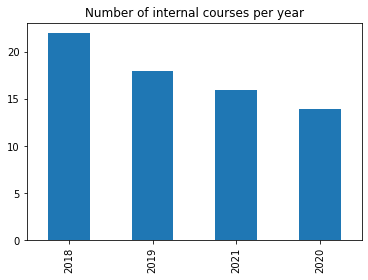

In [100]:
# HIDE CODE
# Generate histogram of internal courses
# import annotated data
annotated_df = pd.read_csv(file_path + "courses_table_annotated.csv", sep=";")
annotated_df_deNBI = annotated_df.loc[annotated_df['deNBI'] == 'N']
annotated_df_deNBI['Year'].value_counts().plot(kind = 'bar')
plt.title('Number of internal courses per year')
plt.savefig(file_path + "figures/internal-courses.svg", format="svg")

In [101]:
# NO CODE
# hide code in cells based on their tags

import nbformat as nbf
# Text to look for in adding tags
text_search_dict = {
    "# HIDDEN": "remove-cell",  # Remove the whole cell
    "# NO CODE": "remove-input",  # Remove only the input
    "# HIDE CODE": "hide-input"  # Hide the input w/ a button to show
}
ipath = file_path+'book/chapters/statistics.ipynb'
ntbk = nbf.read(ipath, nbf.NO_CONVERT)
for cell in ntbk.cells:
    cell_tags = cell.get('metadata', {}).get('tags', [])
    for key, val in text_search_dict.items():
        if key in cell['source']:
            if val not in cell_tags:
                cell_tags.append(val)
    if len(cell_tags) > 0:
        cell['metadata']['tags'] = cell_tags
    nbf.write(ntbk, ipath)